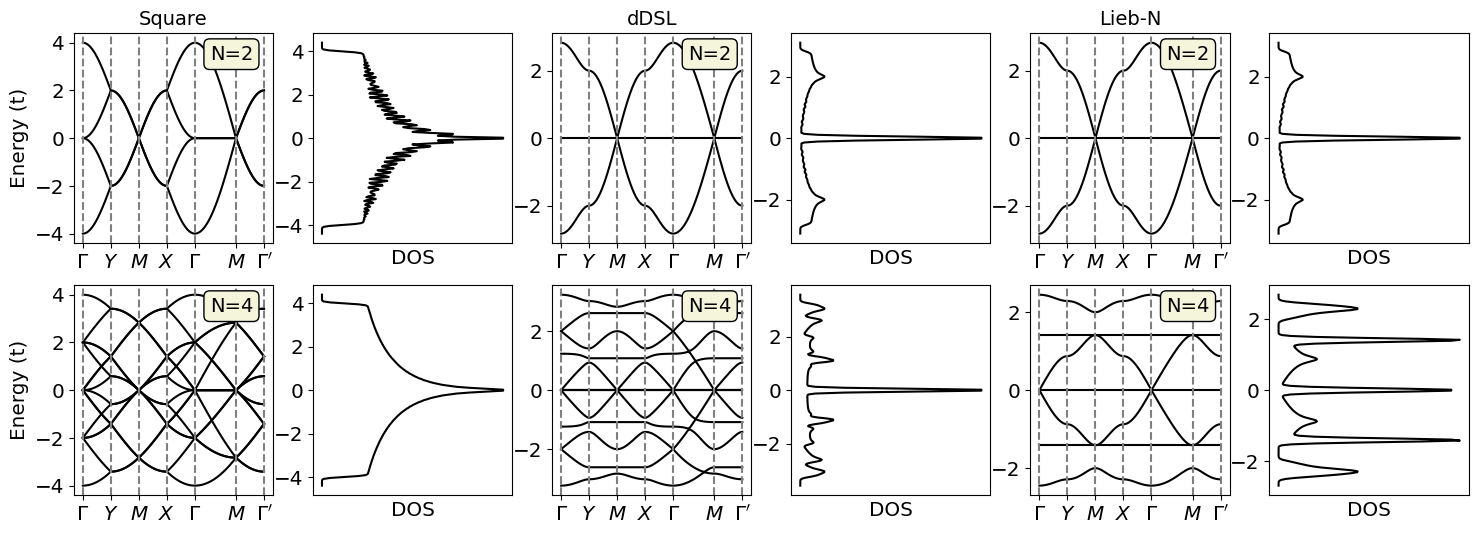

In [1]:
# Runtime: ~2 minutes

import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import models, plotting
reload(models)
reload(plotting)


sizes = [2, 4]
models_dict = {
    'Square':models.SquareLatticeModel, 
    'dDSL':models.dDSLmodel, 
    'Lieb-N':models.LiebNmodel
}

# Define Figure
fig, axes = plt.subplots(len(sizes),2*len(models_dict),
                         figsize=(3*2*len(models_dict), 3*len(sizes)),)
                        #  wspaces=[])

nk_dos = 30
nk_band = 100
hsp_path='GYMXGMH'

fs=14 # fontsize

for row, N in enumerate(sizes):
    for col, model_key in enumerate(models_dict.keys()):
        model = models_dict[model_key](N=N)
        ax_band = axes[row, 2*col]
        ax_dos = axes[row, 2*col+1]
        ylabel = 'Energy (t)' if col==0 else None
        ax_band = plotting.plot_bands(model, bdg=False, nk=nk_band, hsp_path=hsp_path, ax=ax_band, ylabel=ylabel);
        ax_dos = plotting.plot_DOS(model, bdg=False, nk=nk_dos, elim=ax_band.get_ylim(), ax=ax_dos, ylabel=None);
        ax_band.text(0.9, 0.9, f'N={N}', transform=ax_band.transAxes, va='center', ha='right', fontsize=fs,
                     bbox=dict(facecolor='beige', alpha=1.0, boxstyle='round'))
        if row==0: ax_band.set_title(model_key, fontsize=fs)

In [9]:
model = models.SquareLatticeModel(N=1)

k0 = np.array((0,1))
ks = np.stack((k0, k0, k0))
np.matmul(ks, model.lat.reciprocal_vecs)

# model.lat.a1

array([[0.        , 6.28318531],
       [0.        , 6.28318531],
       [0.        , 6.28318531]])